In [1]:
import numpy as np
import mne
import os
import warnings
warnings.filterwarnings('ignore')

path = os.path.join(os.getcwd(), 'subjects')

ec = os.path.join(path, 'sub-19681349_ses-1_task-restEC_eeg.vhdr')
nc = os.path.join(path, 'sub-19681349_ses-1_task-restEO_eeg.vhdr')
ec_raw = mne.io.read_raw_brainvision(ec, preload=True)
nc_raw = mne.io.read_raw_brainvision(nc, preload=True) 

# Set channels

picks = list(set(ec_raw.ch_names) - {'Mass', 'OrbOcc', 'Erbs', 'HNHR', 'HPHL', 'VNVB', 'VPVA'})
ec_raw.pick_channels(picks)
nc_raw.pick_channels(picks);


# To check heart beat artifacts

# ecg_epochs = mne.preprocessing.create_ecg_epochs(nc_raw, ch_name='Erbs', picks=picks)
# ecg_epochs.plot_image(combine='mean')

Extracting parameters from C:\Users\Manmadha Rao\machine learning\subjects\sub-19681349_ses-1_task-restEC_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 60002  =      0.000 ...   120.004 secs...
Extracting parameters from C:\Users\Manmadha Rao\machine learning\subjects\sub-19681349_ses-1_task-restEO_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 60013  =      0.000 ...   120.026 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


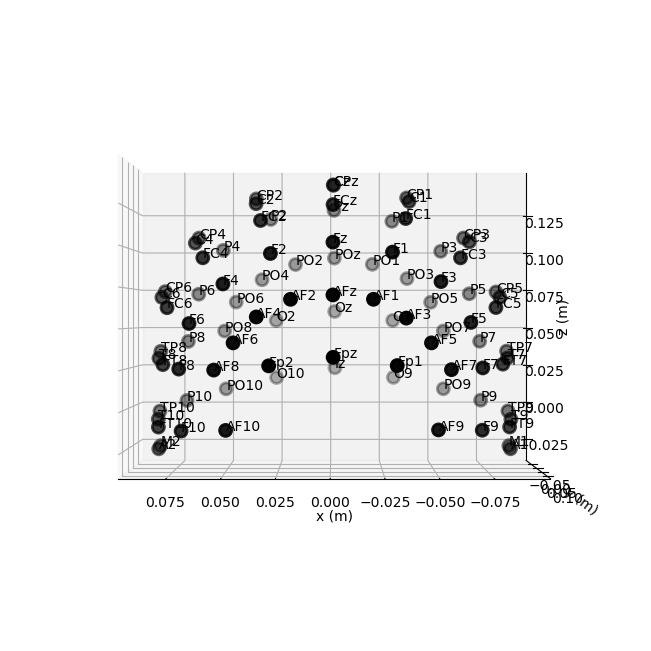

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


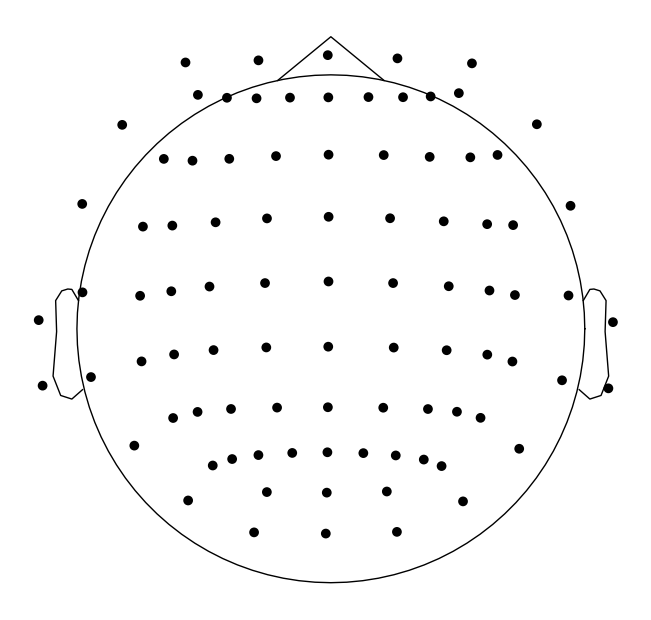

In [2]:
# Set montage

ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

ec_raw.set_montage(ten_twenty_montage)
nc_raw.set_montage(ten_twenty_montage)

fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)  # set view angle
ten_twenty_montage.plot(kind='topomap', show_names=False);

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished


Fitting ICA to data using 26 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 5.7s.


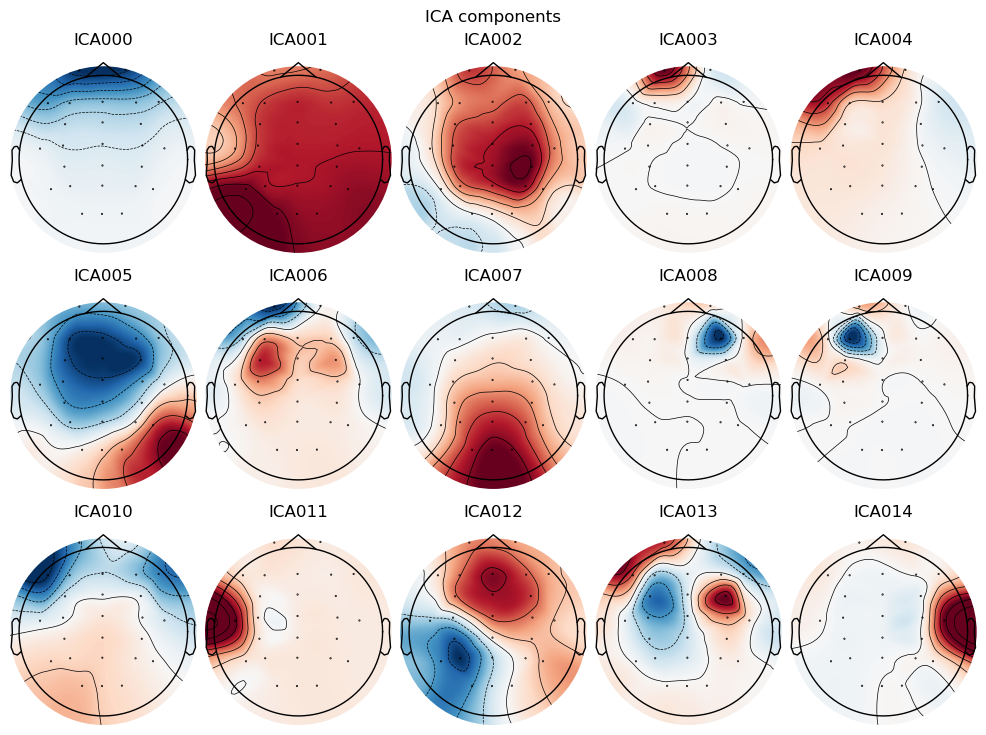

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 26 PCA components


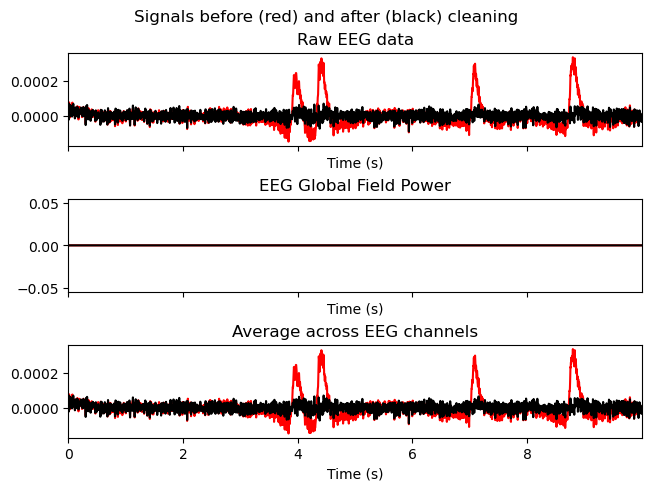

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 26 PCA components


In [3]:
# Artifact removal -- Eyes open

ica = mne.preprocessing.ICA(n_components=15, max_iter='auto', random_state=42)

nc_filt = nc_raw.copy().filter(l_freq=1., h_freq=None)
ica.fit(nc_filt)

ica.plot_components() 
ica.plot_overlay(nc_filt, start=0., stop=10., exclude=[0], picks=['Fp1']) # Selecting first component

ica.exclude = [0]
ica.apply(nc_raw);

In [4]:
# Filtering

ec_raw.filter(l_freq=.5, h_freq=None, verbose=0)
nc_raw.filter(l_freq=.5, h_freq=None, verbose=0);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished


In [5]:
#metadata

ec_raw.info, nc_raw.info

(<Info | 8 non-empty values
  bads: []
  ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC3, FCz, FC4, T7, C3, Cz, C4, T8, ...
  chs: 26 EEG
  custom_ref_applied: False
  dig: 29 items (3 Cardinal, 26 EEG)
  highpass: 0.5 Hz
  lowpass: 250.0 Hz
  meas_date: unspecified
  nchan: 26
  projs: []
  sfreq: 500.0 Hz
 >,
 <Info | 8 non-empty values
  bads: []
  ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC3, FCz, FC4, T7, C3, Cz, C4, T8, ...
  chs: 26 EEG
  custom_ref_applied: False
  dig: 29 items (3 Cardinal, 26 EEG)
  highpass: 0.5 Hz
  lowpass: 250.0 Hz
  meas_date: unspecified
  nchan: 26
  projs: []
  sfreq: 500.0 Hz
 >)

In [6]:
pip install mne-qt-browser

Note: you may need to restart the kernel to use updated packages.


In [7]:
with mne.viz.use_browser_backend('qt'):
    nc_raw.plot(highpass=.5, lowpass=50., filtorder=2)

Using qt as 2D backend.
Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



In [8]:
# Plot -- Closed eyes

with mne.viz.use_browser_backend('qt'):
    ec_raw.plot(highpass=.5, lowpass=50., filtorder=2)

Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


Text(0.5, 0.98, 'Eyes closed')

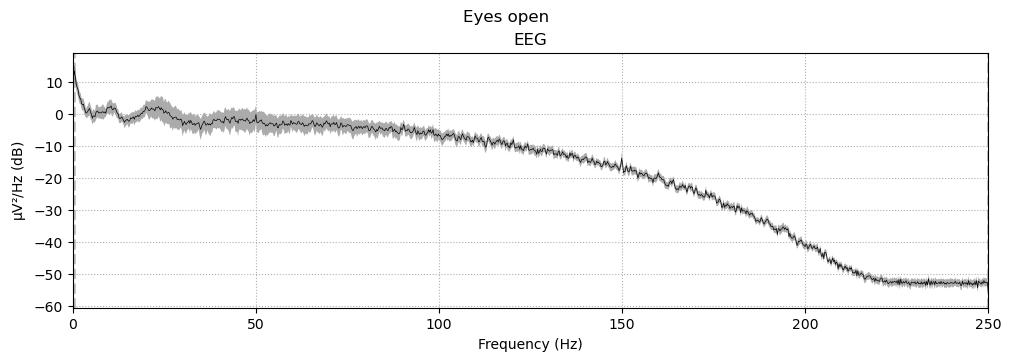

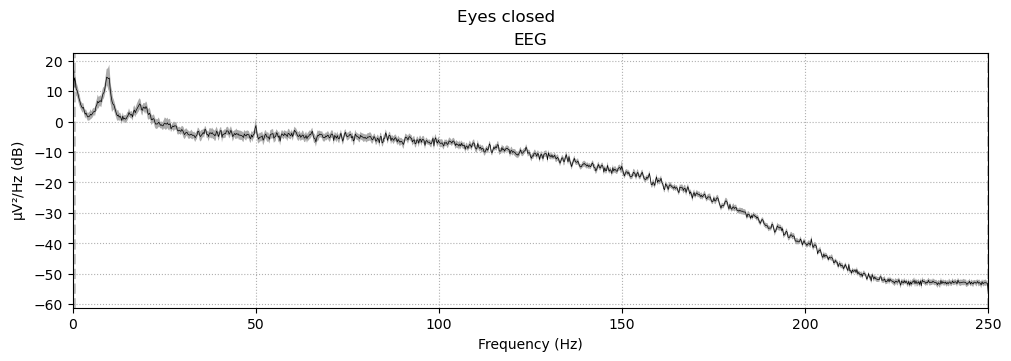

In [9]:
# Observe powerline noise and plot PSD
# NO powerline noise observed in the data

fig1 = nc_raw.plot_psd(fmax=250, average=True)
fig1.suptitle('Eyes open')
fig2 = ec_raw.plot_psd(fmax=250, average=True)
fig2.suptitle('Eyes closed')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 20.480 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 20.480 (s)


Text(0.5, 0.98, 'Eyes open')

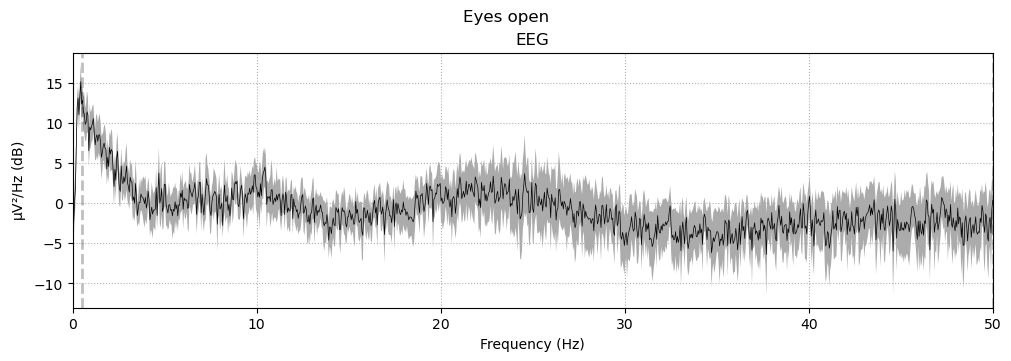

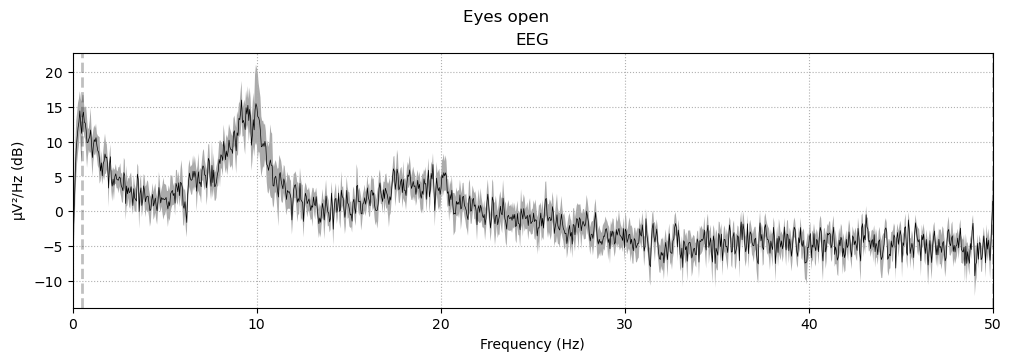

In [10]:
# Resampling

nc_raw.resample(100, verbose=0)
ec_raw.resample(100, verbose=0);

fig1 = nc_raw.plot_psd(average=True)
fig1.suptitle('Eyes open')

fig2 = ec_raw.plot_psd(average=True)
fig2.suptitle('Eyes open')

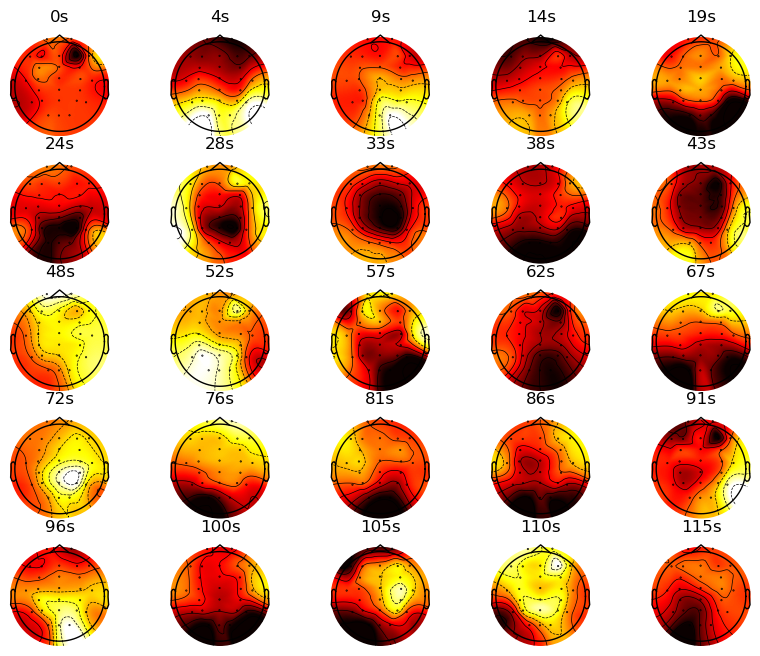

In [11]:
# Temporal topomap plots

data, times = ec_raw.get_data(return_times=True)
channel_indices_by_type = mne.io.pick.channel_indices_by_type(ec_raw.info)
len(channel_indices_by_type['eeg'])
info = mne.pick_info(ec_raw.info, channel_indices_by_type['eeg'])

import matplotlib

def plot_topomaps(data, info):
    _, nsamps = data.shape
    fig = matplotlib.figure.Figure(figsize=(10,8))
    axs = fig.subplots(5,5)
    for row in range(5):
        for col in range(5):
            samp = int(nsamps*(row*5+col)/25)
            t = samp/info['sfreq']
            mne.viz.plot_topomap(data[:,samp], info, axes=axs[row,col], cmap='hot_r', show=False)
            axs[row,col].set_title('%ds'%(int(t)))
    return(fig)

plot_topomaps(data,info)

Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 4 events and 3000 original time points ...
0 bad epochs dropped
NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows
converting legacy list-of-tuples input to a dict for the `bands` parameter


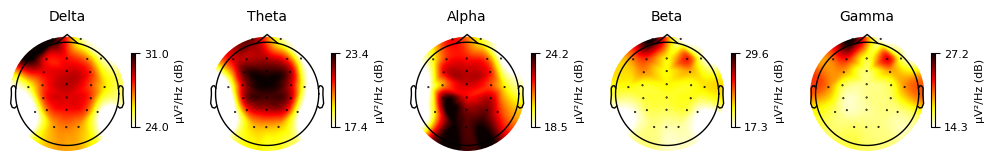

In [12]:
# Topomap -- Eyes open

duration = 30.
bands = [(0, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'),
         (12, 30, 'Beta'), (30, 45, 'Gamma')]

nc_epoch = mne.make_fixed_length_epochs(nc_raw, duration=duration, preload=True)

nc_epoch.plot_psd_topomap(bands=bands,
            bandwidth=None, adaptive=False, low_bias=True, normalization='length', 
            ch_type=None, cmap='hot_r', agg_fun=None, dB=True, n_jobs=-1, 
            normalize=False, 
            cbar_fmt='auto', outlines='head', show=True);

Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 4 events and 3000 original time points ...
0 bad epochs dropped
NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows
converting legacy list-of-tuples input to a dict for the `bands` parameter


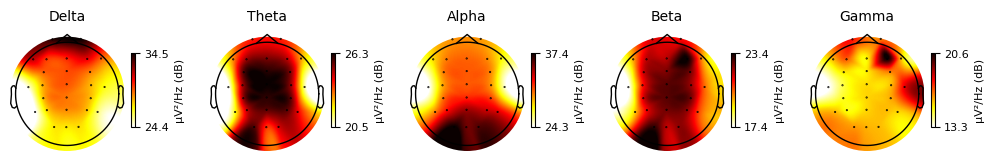

In [13]:
# Topomap -- Eyes closed

ec_epoch = mne.make_fixed_length_epochs(ec_raw, duration=duration, preload=True)

ec_epoch.plot_psd_topomap(bands=bands,
            bandwidth=None, adaptive=False, low_bias=True, normalization='length', 
            ch_type=None, cmap='hot_r', agg_fun=None, dB=True, n_jobs=-1, 
            normalize=False, 
            cbar_fmt='auto', outlines='head', show=True);

In [14]:
!pip install --upgrade mne


In [16]:
# from mne.time_frequency import psd_welch
# alpha = (8, 12)
# fmin = 0
# fmax= 100
# average = 'mean'
# window = 'hamming'

# psd1, freq = mne.time_frequency.psd_welch(ec_raw,window=window, picks=picks,average=average, verbose=0)
# psd2, freq = mne.time_frequency.psd_welch(nc_raw,window=window, picks=picks,average=average, verbose=0)

# freq_idx = [np.argmin(np.abs(freq - frequency)) for frequency in alpha]
# freq_range = slice(freq_idx[0], freq_idx[1] + 1)

# psd_diff = psd2 - psd1
# psd_avg = psd_diff[:, freq_idx].mean(axis = 1)

# mne.viz.plot_topomap(psd_avg, info, cmap='hot_r', outlines='head', show=True)
from mne.time_frequency import psd_array_multitaper

alpha = (8, 12)
fmin = 0
fmax= 100
average = 'mean'
window = 'hamming'

# Assuming 'ec_raw' and 'nc_raw' are your Raw objects
psd1, freq = psd_array_multitaper(ec_raw.get_data(), ec_raw.info['sfreq'], fmin=fmin, fmax=fmax)
psd2, freq = psd_array_multitaper(nc_raw.get_data(), nc_raw.info['sfreq'], fmin=fmin, fmax=fmax)

freq_idx = [np.argmin(np.abs(freq - frequency)) for frequency in alpha]
freq_range = slice(freq_idx[0], freq_idx[1] + 1)

psd_diff = psd2 - psd1
psd_avg = psd_diff[:, freq_idx].mean(axis = 1)

mne.viz.plot_topomap(psd_avg, info, cmap='hot_r', outlines='head', show=True)


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: operands could not be broadcast together with shapes (26,6002) (26,6001) 